In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("iris")

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.drop(columns="species", inplace=True)

In [4]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [9]:
X = df.iloc[:,2:]
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


<Axes: xlabel='petal_length', ylabel='petal_width'>

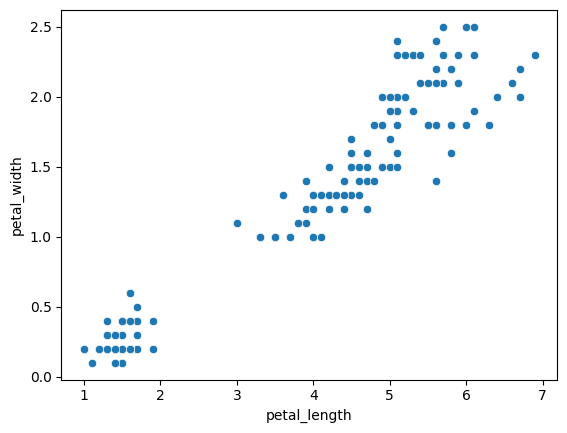

In [10]:
sns.scatterplot(x=X["petal_length"], y=X["petal_width"])

In [11]:
from sklearn.cluster import KMeans


## Number of cluster

In [14]:
no_of_cluster = range(2,11)

In [16]:
ssd = []
for k in no_of_cluster:
  model = KMeans(n_clusters=k, random_state=0, n_init='auto')
  model.fit(X)
  ssd.append(model.inertia_)

In [33]:
print(no_of_cluster)
print(ssd)

range(2, 11)
[86.39021984551397, 31.37135897435897, 20.238882783882786, 14.130893864755933, 11.090774889156016, 9.523565023670287, 8.125074352548037, 7.994625233426706, 7.176194677871147]


# Plot

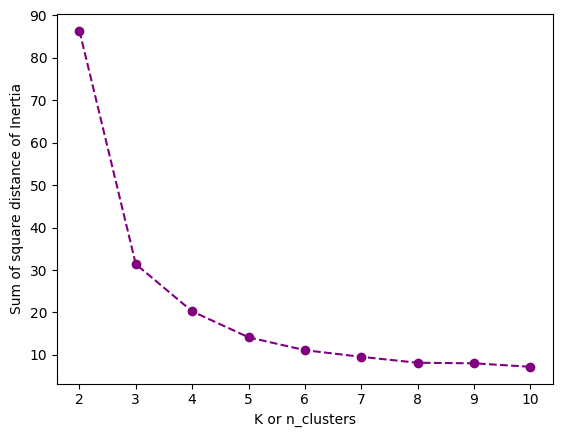

In [20]:
plt.plot(no_of_cluster, ssd, 'o--', color='purple')
plt.xlabel("K or n_clusters")
plt.ylabel("Sum of square distance of Inertia")
plt.show()

### Looking into the figure elbow lies in 3. Therefore k = 3



In [21]:
k = 3
model =KMeans(n_clusters=3, random_state=0, n_init='auto')
model.fit(X)
clusters = model.predict(X)
cluster_centre = model.cluster_centers_

In [22]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

<Axes: xlabel='petal_length', ylabel='petal_width'>

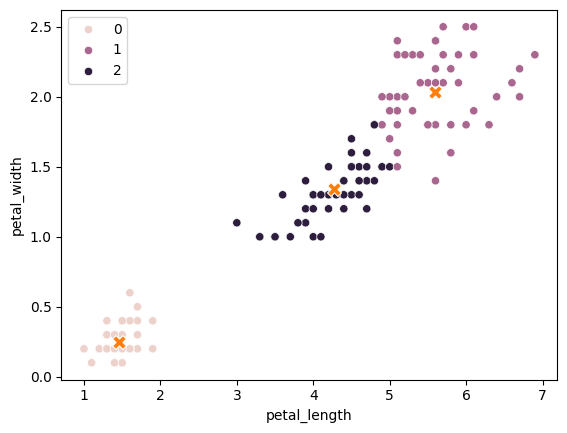

In [32]:
sns.scatterplot(x=X["petal_length"], y=X["petal_width"], hue=clusters)
sns.scatterplot(x=cluster_centre[:,0], y =cluster_centre[:,1], marker="X",s=100)